The following code loads optdigits dataset and displays sample digits. The features vectors (8x8 images of the digits) are loaded as X and labels (0 - 9) are loaded as  y. Note that every image is encoded as a (64,) list.

/usr/local/lib/python3.10/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


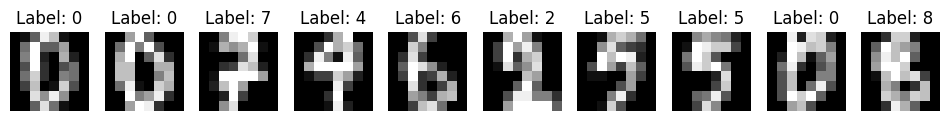

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Load the optdigits dataset from OpenML
optdigits = fetch_openml(name="optdigits", version=1, as_frame=False)
X, y = optdigits.data, optdigits.target

# Reshape the images (64 features -> 8x8 images)
def plot_digits(images, labels, num_samples=10):
    """Plots sample images from the dataset."""
    fig, axes = plt.subplots(1, num_samples, figsize=(12, 4))
    for i in range(num_samples):
        axes[i].imshow(images[i].reshape(8, 8), cmap='gray')
        axes[i].set_title(f"Label: {labels[i]}")
        axes[i].axis("off")
    plt.show()

# Display sample digits
plot_digits(X, y, num_samples=10)

This function trains a Random Forest classifier to recognize digits. The function takes the feature array X and label array y and returns the cross-validation score. You will use this function to perform the forward feature selection.

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

def random_forest_cv(X, y):
    """
    Applies a Random Forest classifier to the given dataset,
    performs 3-fold cross-validation, and returns the average accuracy.
    
    Parameters:
    - X: Feature matrix
    - y: Target labels
    
    Returns:
    - avg_accuracy: Average classification accuracy over 3-fold cross-validation
    """
    # Initialize the Random Forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Perform 3-fold cross-validation
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    
    # Calculate and return the average accuracy
    avg_accuracy = np.mean(scores)
    
    return avg_accuracy

print(random_forest_cv(X,y))

0.9750882383162934




**Problem 1**
Implement forward feature selection with the optdigits dataset and the classification function given above. Do not use library functions for forward feature selection, use your own code. The output of the code should be:
1) Number of selected features
2) List of selected features (print the index, for example, 0,5,12...)
3) Plot of classification accuracy vs. the number of selected features

In the report, please justify how you established the number of features to be included in the classification.


Added feature 20 with Cross-Validation accuracy: 0.2724
Added feature 42 with Cross-Validation accuracy: 0.4039
Added feature 30 with Cross-Validation accuracy: 0.5520
Added feature 44 with Cross-Validation accuracy: 0.6489
Added feature 21 with Cross-Validation accuracy: 0.7443
Added feature 27 with Cross-Validation accuracy: 0.8121
Added feature 18 with Cross-Validation accuracy: 0.8584
Added feature 61 with Cross-Validation accuracy: 0.8902
Added feature 43 with Cross-Validation accuracy: 0.9126
Added feature 10 with Cross-Validation accuracy: 0.9302
Added feature 5 with Cross-Validation accuracy: 0.9436
Added feature 34 with Cross-Validation accuracy: 0.9525
Added feature 37 with Cross-Validation accuracy: 0.9564
Added feature 52 with Cross-Validation accuracy: 0.9619
Added feature 35 with Cross-Validation accuracy: 0.9641
Number of selected features: 15
Selected features: [20, 42, 30, 44, 21, 27, 18, 61, 43, 10, 5, 34, 37, 52, 35]


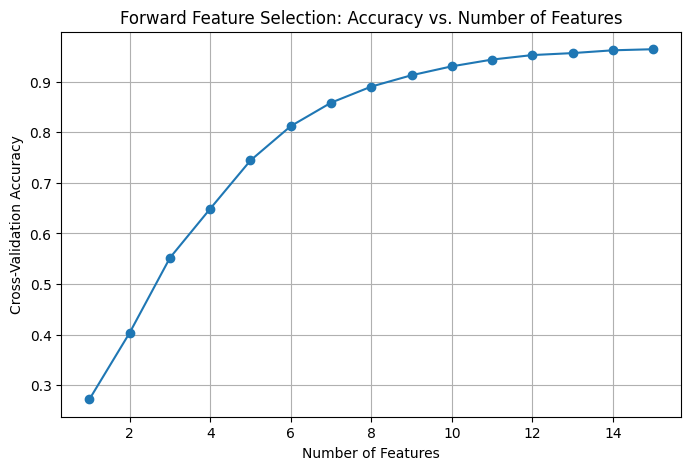

In [3]:
def forward_feature_selection(X, y):
    """
    Perform forward feature selection on dataset X with target y.
    
    Parameters:
    - X: NumPy array feature matrix
    - y: Labels for each sample
    
    Returns:
    - selected_features: List of indices of the selected features
    - accuracy_history: List of cross-validation accuracies recorded as each feature is added
    """
    
    #Intialize list of remaining features, selected features, and accuracy.
    selected_features = []
    remaining_features = list(range(X.shape[1]))  
    accuracy_history = []
    current_best_accuracy = 0
    
    """
    Iterate through features and select feature that improves accuracy the best.
    Stop when no feature improves the classifer accuracy.
    """
    while remaining_features:
        best_feature = None
        best_accuracy = current_best_accuracy
        for feature in remaining_features:
            candidate_features = selected_features + [feature]
            X_subset = X[:, candidate_features]
            acc = random_forest_cv(X_subset, y)
            if acc > best_accuracy:
                best_accuracy = acc
                best_feature = feature
        if best_feature is not None:
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
            current_best_accuracy = best_accuracy
            accuracy_history.append(current_best_accuracy)
            print(f"Added feature {best_feature} with Cross-Validation accuracy: {best_accuracy:.4f}")
        else:
            break

    return selected_features, accuracy_history

#Forward feature selection function call
selected_features, accuracy_history = forward_feature_selection(X, y)
print("Number of selected features:", len(selected_features))
print("Selected features:", selected_features)

# Plot accuracy versus number of features
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(accuracy_history)+1), accuracy_history, marker='o')
plt.xlabel("Number of Features")
plt.ylabel("Cross-Validation Accuracy")
plt.title("Forward Feature Selection: Accuracy vs. Number of Features")
plt.grid(True)
plt.show()

**Problem 2** Study the function to perform PCA given below. Use this function to investigare recogntruction error on the optdigits dataset by varying the number of pricipal components from 1 to 64. 

Plot the graph of reconstruction error vs the number of pricipal components, explain the results.
Modify the plotting function below to plot three principal compoenents in 3 dimensions.

In [4]:
def pca(X, N):
    """
    Perform Principal Component Analysis (PCA) on dataset X with N principal components.

    Parameters:
    - X: NumPy array (m x f), input dataset with m instances and d features
    - d: Number of principal components to retain

    Returns:
    - Xd: Transformed dataset in the d principal component directions
    - Xx: Reconstructed dataset from the d principal components
    """
    # Number of instances (m) and features (f)
    m, f = X.shape

    # Compute the mean of inputs
    mean_X = np.mean(X, axis=0)
    X_centered = X - mean_X  # Center the data by subtracting the mean

    # Compute the covariance matrix (PCA scatter matrix)
    S = np.dot(X_centered.T, X_centered)

    # Eigenvalue decomposition
    eig_vals, eig_vecs = np.linalg.eig(S)

    # Sort eigenvalues and eigenvectors in ascending order
    sorted_indices = np.argsort(eig_vals)
    eig_vecs_sorted = eig_vecs[:, sorted_indices]

    # Select the d principal eigenvectors
    V_d = eig_vecs_sorted[:, -N:]  # Select last d eigenvectors

    # Project the data onto the N principal eigenvectors
    Xd = np.dot(X_centered, V_d)

    # Reconstruct the dataset using the principal components
    Xx = np.dot(Xd, V_d.T) + mean_X

    # Ensure non-negative values (assuming image data)
    Xx = np.maximum(Xx, 0)

    return Xd, Xx

Xd, Xx = pca(X, 2)
print("Xd (Transformed Data):", Xd.shape)
print("Xx (Reconstructed Data):", Xx.shape)

Xd (Transformed Data): (5620, 2)
Xx (Reconstructed Data): (5620, 64)


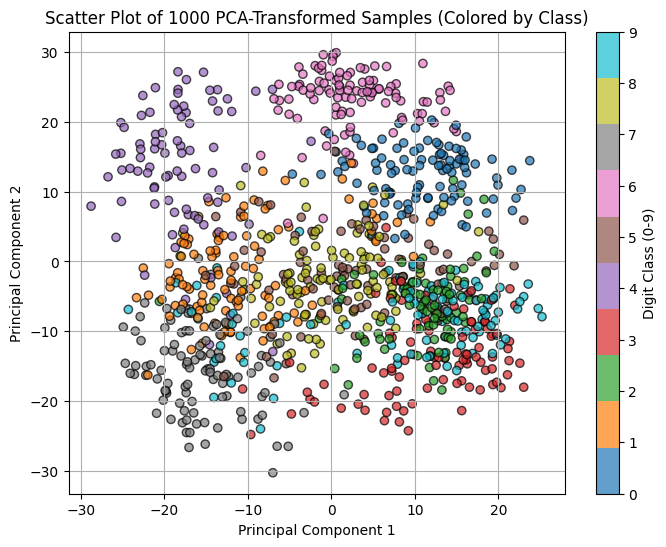

In [5]:
def plot_pca_samples(Xd, y, N=100):
    """
    Plots N samples of the 2D PCA-transformed dataset Xd with colors indicating class labels.

    Parameters:
    - Xd: NumPy array of shape (m, 2), 2D PCA-transformed data
    - y: NumPy array of shape (m,), class labels (digits 0-9)
    - N: Number of samples to plot (default: 100)
    """
    if Xd.shape[1] != 2:
        raise ValueError("Xd must have exactly 2 dimensions for plotting.")
    if len(y) != Xd.shape[0]:
        raise ValueError("y must have the same number of samples as Xd.")

    # Select N random samples if N < total samples
    if N < Xd.shape[0]:
        indices = np.random.choice(Xd.shape[0], N, replace=False)
        Xd_sample, y_sample = Xd[indices], y[indices]
    else:
        Xd_sample, y_sample = Xd, y

    # Convert labels to integers for correct colormap mapping
    y_sample = y_sample.astype(int)

    # Scatter plot with color mapping based on labels
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(Xd_sample[:, 0], Xd_sample[:, 1], c=y_sample, cmap="tab10", alpha=0.7, edgecolors="k")
    
    # Add labels and title
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.title(f"Scatter Plot of {N} PCA-Transformed Samples (Colored by Class)")
    
    # Add colorbar with digit labels
    cbar = plt.colorbar(scatter)
    cbar.set_label("Digit Class (0-9)")
    cbar.set_ticks(range(10))  # Ensure only digits 0-9 are labeled

    plt.grid(True)
    plt.show()
    
plot_pca_samples(Xd, y, N=1000)  # Plot 100 samples

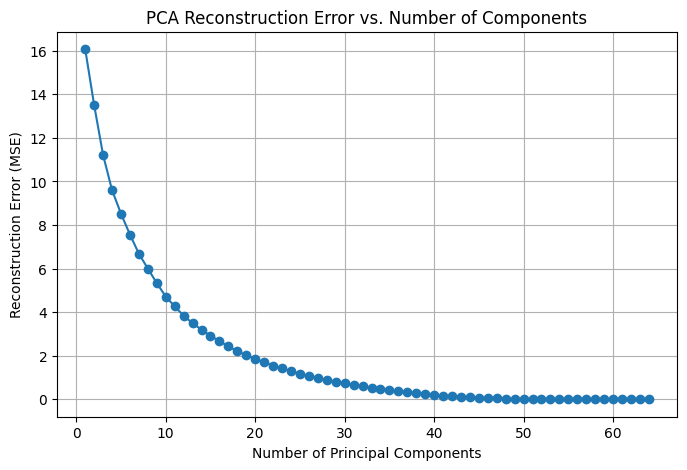

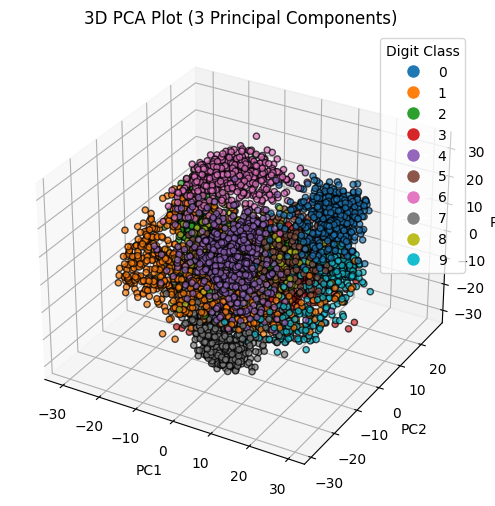

In [6]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.lines as mlines

#Use PCA function to obtain MSE of reconstruction for each possible number of features
reconstruction_errors = []
components = range(1, 65)
for n in components:
    _, X_reconstructed = pca(X, n)
    error = np.mean((X - X_reconstructed) ** 2)
    reconstruction_errors.append(error)

#Plot reconstruction error versus number of components
plt.figure(figsize=(8, 5))
plt.plot(components, reconstruction_errors, marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Reconstruction Error (MSE)")
plt.title("PCA Reconstruction Error vs. Number of Components")
plt.grid(True)
plt.show()

Xd_3d, _ = pca(X, 3)

#Plot 3D PCA
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(Xd_3d[:, 0], Xd_3d[:, 1], Xd_3d[:, 2],
                     c=y.astype(int), cmap='tab10', edgecolor='k', alpha=0.7)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("3D PCA Plot (3 Principal Components)")

# Create legend for plot
unique_labels = np.unique(y.astype(int))
handles = []
for label in unique_labels:
    color = plt.cm.tab10(label/10)
    handle = mlines.Line2D([], [], marker='o', color='w', markerfacecolor=color,
                           markersize=10, label=str(label))
    handles.append(handle)

ax.legend(handles=handles, title="Digit Class", loc='upper right')

plt.show()

**Problem 3**
Plot the mean and first 8 principal components as images (8x8 grayscale bitmaps) - eigendigits. The process is explained here: https://en.wikipedia.org/wiki/Eigenface. 

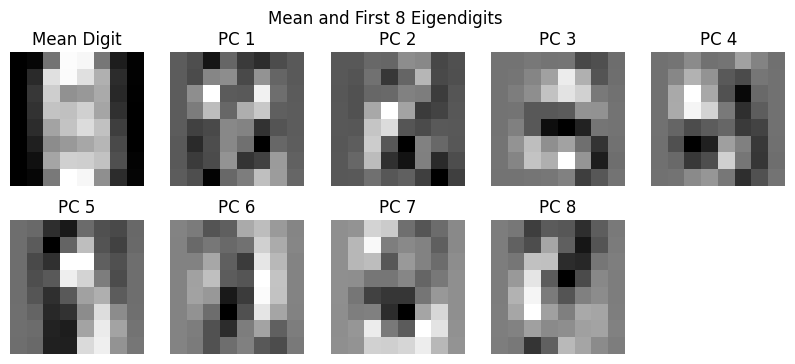

In [7]:
mean_digit = np.mean(X, axis=0)

# Center data and compute the covariance matrix
X_centered = X - mean_digit
S = np.dot(X_centered.T, X_centered)
eig_vals, eig_vecs = np.linalg.eig(S)
sorted_indices = np.argsort(eig_vals)
eig_vecs_sorted = eig_vecs[:, sorted_indices]

# Get the first 8 principal components
eigendigits = eig_vecs_sorted[:, -8:]

plt.figure(figsize=(10, 4))

# Plot the mean digit
plt.subplot(2, 5, 1)
plt.imshow(mean_digit.reshape(8, 8), cmap='gray')
plt.title("Mean Digit")
plt.axis("off")

# Plot the first 8 principal components as images
for i in range(8):
    plt.subplot(2, 5, i+2)
    plt.imshow(eigendigits[:, i].reshape(8, 8), cmap='gray')
    plt.title(f"PC {i+1}")
    plt.axis("off")

plt.suptitle("Mean and First 8 Eigendigits")
plt.show()